# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/sample_data/customer_booking_og.csv",encoding="ISO-8859-1")
#df.head()

The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
df.describe()


,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

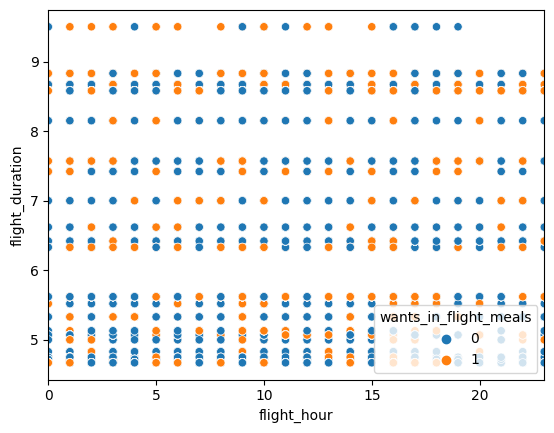

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# reading the database
data = pd.read_csv("/content/sample_data/customer_booking1.csv")


# draw lineplot

# works ...... sns.scatterplot(x="length_of_stay", y="purchase_lead", data=data,hue='booking_complete')
#Works
sns.scatterplot(x="flight_hour", y="flight_duration", data=data,hue='wants_in_flight_meals')

#hue='booking_complete'
#sns.xlim(xmin=1, xmax=100)
#sns.histplot(x='length_of_stay', data=data, kde=True, hue='wants_extra_baggage')
#ax = plt.gca()

# Set the limits of the x-axis
#ax.set_xlim(10, 30)
#ax.set_ ylim(0, 3000)

#sns.histplot(data=df, x='flight_hour', color='blue', label='Flight Hour',hue='booking_complete')
#sns.histplot(data=df, x='length_of_stay', color='orange', label=' Number of days',hue='booking_complete')

ax = plt.gca()

# Set the limits of the x-axis
ax.set_xlim(0,23)
#ax.set_ylim(0, 3000)



# setting the title using Matplotlib
#plt.title('Title using Matplotlib Function')

plt.show()
#data.head()



In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [ ]:
col_num = df.columns.get_loc('route')

# Insert the new column at the desired index
df.insert(col_num + 1, 'Destination', ' ')

for index,rows in df.iterrows():
  val=rows['route']
  #print(val)
  val1= val[:3]

  val2 = val[3:]
  df.at[index, 'route'] = val1
  df.at[index, 'Destination'] = val2


df.head(4)
df.rename(columns={'route': 'Origin'}, inplace=True)








In [ ]:
df.head(4)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,Origin,Destination,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKL,DEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKL,DEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKL,DEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKL,DEL,New Zealand,0,0,1,5.52,0


In [ ]:
df.to_csv('/content/sample_data/customer_booking1.csv',index=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score
from xgboost import XGBClassifier

# Load the dataset from a CSV file
data = pd.read_csv("/content/sample_data/customer_booking1.csv")

#drop columns sales_channel=85.06, trip_type=85.06, purchase_lead=84.7, flight_day=85.18, wants_extra_baggage=85.14
#, wants_preferred_seat=85.12, wants_in_flight_meals=85.07,  length_of_stay=84.76, flight_hour=84.82, Origin=85.1, Destination=85.12
# List the columns to be dropped
columns_to_drop = ['booking_complete']

# Drop the specified columns
#data.drop(columns=columns_to_drop)

# Separate the features (X) and the target variable (y)
X = data.drop(columns=columns_to_drop, axis=1)  # Update 'target_variable_name' with the actual column name
y = data['booking_complete']

# Perform one-hot encoding for categorical variables
X = pd.get_dummies(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
# Create a Random Forest classifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8501333333333333
Precision: 0.4751552795031056
Recall: 0.13808664259927797
F1 Score: 0.21398601398601397


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create the AdaBoost classifier
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the classifier
ada_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8499333333333333


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the GradientBoosting classifier
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.853


In [ ]:
import xgboost as xgb

# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8518


[4.23098630e-02 1.93605757e-01 1.08150124e-01 1.26871287e-01
 8.20320235e-02 1.44927461e-02 1.88058900e-02 2.21112577e-02
 3.19036831e-02 7.14113332e-03 6.93596178e-03 1.97109229e-04
 5.03653866e-04 5.65952552e-04 2.29412169e-03 1.01498280e-03
 2.17932708e-04 1.98753848e-03 7.20501645e-03 1.04931711e-03
 1.56968972e-05 0.00000000e+00 1.06242813e-03 8.92435104e-04
 9.21964503e-04 9.09731657e-04 1.04645802e-03 5.02051659e-03
 7.05304355e-04 1.37214633e-03 2.16036223e-03 2.30388419e-03
 3.97482746e-04 2.85741389e-06 2.23858834e-03 1.74751033e-03
 1.45235558e-04 2.80525814e-04 5.44072317e-04 2.49820301e-03
 4.15877884e-03 4.50387373e-03 2.51379924e-04 1.27524371e-03
 1.17311611e-03 1.64859650e-03 2.12593858e-03 3.63034138e-03
 4.20179694e-03 1.16331631e-03 4.05014624e-03 2.14357966e-04
 2.19527803e-05 4.72895117e-03 1.17040636e-03 2.31176298e-03
 1.31082522e-03 5.35963214e-03 0.00000000e+00 4.26881986e-03
 1.75022512e-04 1.82181580e-03 6.43206578e-05 1.25659999e-03
 0.00000000e+00 2.617508

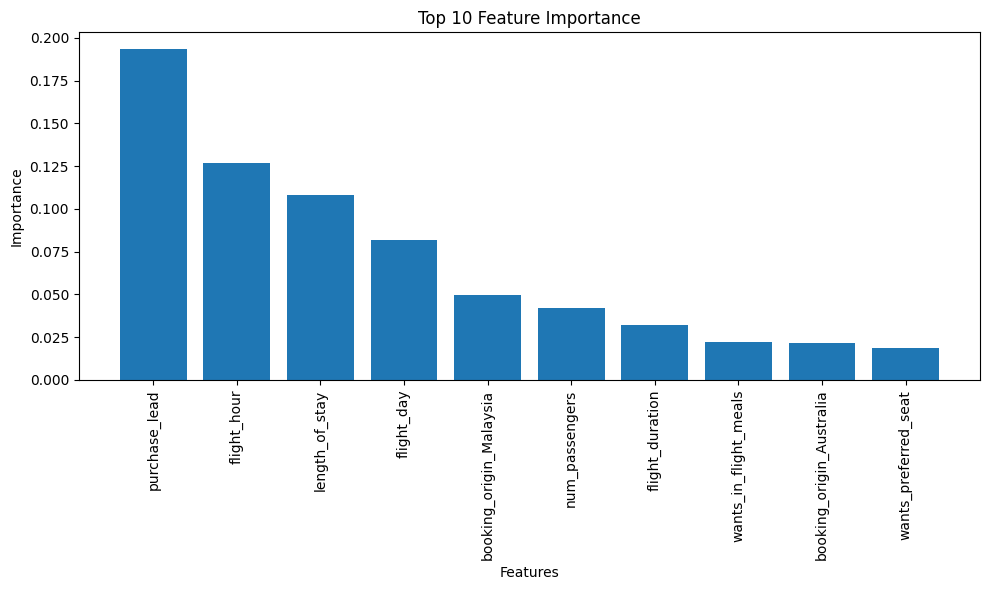

In [ ]:

from sklearn.ensemble import RandomForestRegressor

# Create and fit the Random Forest model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances from the model
importances = model.feature_importances_
print(importances)

# Get feature names
feature_names = X.columns

print('...........................................................................................................................................')
# Sort feature importances in descending order and select top 10 features
indices = np.argsort(importances)[::-1][:10]
print(indices)

# Select top 10 feature names
top_feature_names = feature_names[indices]
print(top_feature_names)

# Plot feature importances for top 10 features
plt.figure(figsize=(10, 6))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), top_feature_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importance')
plt.tight_layout()
plt.show()


In [ ]:
print(X.columns)

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'sales_channel_Internet',
       ...
       'booking_origin_Timor-Leste', 'booking_origin_Tonga',
       'booking_origin_Tunisia', 'booking_origin_Turkey',
       'booking_origin_Ukraine', 'booking_origin_United Arab Emirates',
       'booking_origin_United Kingdom', 'booking_origin_United States',
       'booking_origin_Vanuatu', 'booking_origin_Vietnam'],
      dtype='object', length=267)
